## Regularization: Ridge and Lasso Regression

In this section, we will try to visualize the effect of regularization using **L1 norm (Lasso regression)** and **L2 norm (Ridge regression)**. Let us have a small number of datapoints and try to fit a complex model to it:

In [2]:
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def generate_data(n=100, noise=10):
    np.random.seed(42)
    X = np.random.uniform(-10,10, n)
    y = X**2 - 2 * X + np.random.randn(n) * noise
    return X,y

X, y = generate_data(n=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
def compute_rms_error(y_true, y_pred):
    return np.sqrt(np.mean(y_true - y_pred) ** 2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

degrees = [2, 6, 8]
lambdas = [1e4, 1, 1e-4, 1e-8]

ridge_rmse_train = np.zeros((len(degrees),len(lambdas)))
ridge_rmse_test = np.zeros((len(degrees),len(lambdas)))
lasso_rmse_train = np.zeros((len(degrees),len(lambdas)))
lasso_rmse_test = np.zeros((len(degrees),len(lambdas)))

for degree_idx, degree in enumerate(degrees):
    fig, axs = plt.subplots(1, 4, figsize=(20,5))
    for lambda_idx, lambda_val in enumerate(lambdas):
        ploy_features = PolynomialFeatures(degree=degree)
        X_train_ploy = ploy_features.fit_transform(X_train[:, np.newaxis])
        X_test_ploy = ploy_features.transform(X_test[:, np.newaxis])

        # Ridge Regression using sckit-learn
        ridge_model = Ridge(alpha=lambda_val)
        ridge_model.fit(X_train_ploy, y_train)
        y_train_pred_ridge = ridge_model.predict(X_train_ploy)
        y_test_pred_ridge = ridge_model.predict(X_test_ploy)

        # Lasso Regression using sckit-learn
        laso_model = Lasso(alpha=lambda_val)
        laso_model.fit(X_train_ploy, y_train)
        y_train_pred_lasso = laso_model.predict(X_train_ploy)
        y_test_pred_lasso = laso_model.predict(X_test_ploy)

        ridge_rmse_train[degree_idx,lambda_idx] = compute_rms_error(y_train, y_train_pred_ridge)
        ridge_rmse_test[degree_idx, lambda_idx] = compute_rms_error(y_test, y_test_pred_ridge)
        lasso_rmse_train[degree_idx, lambda_idx] = compute_rms_error(y_train, y_train_pred_lasso)
        lasso_rmse_test[degree_idx, lambda_idx] = compute_rms_error(y_test, y_test_pred_lasso)


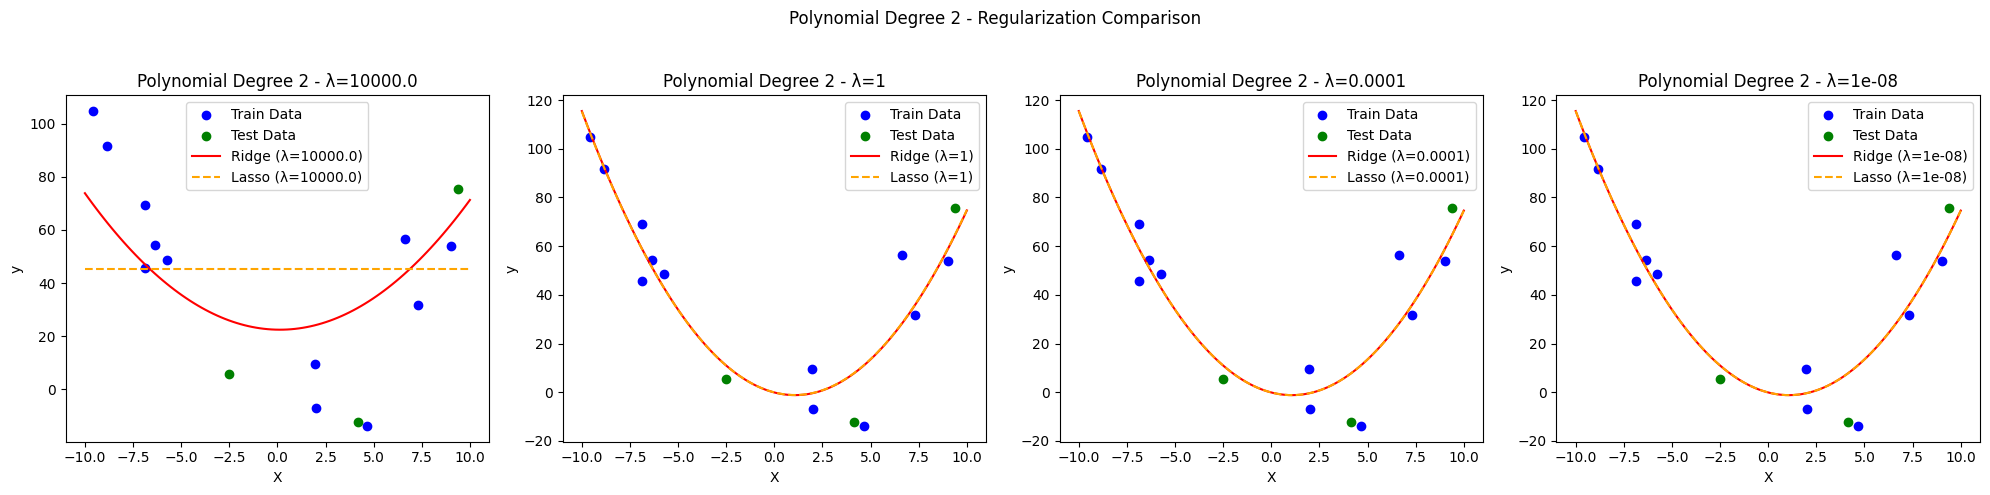

c:\Users\golde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.735e+00, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\golde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.588e+02, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\golde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.30953e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="p

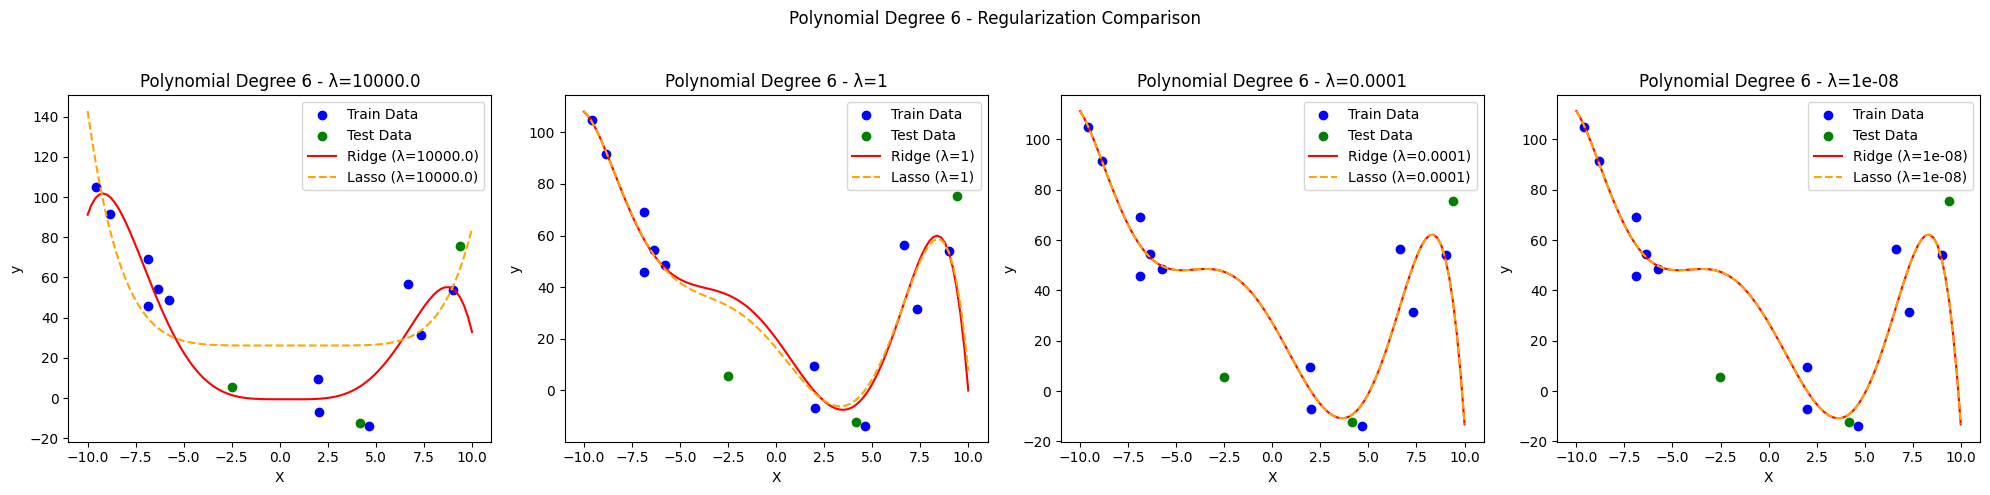

c:\Users\golde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.824e+02, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\golde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.58344e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\golde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.461e+02, tolerance: 1.426e+00
  model = cd_fast.

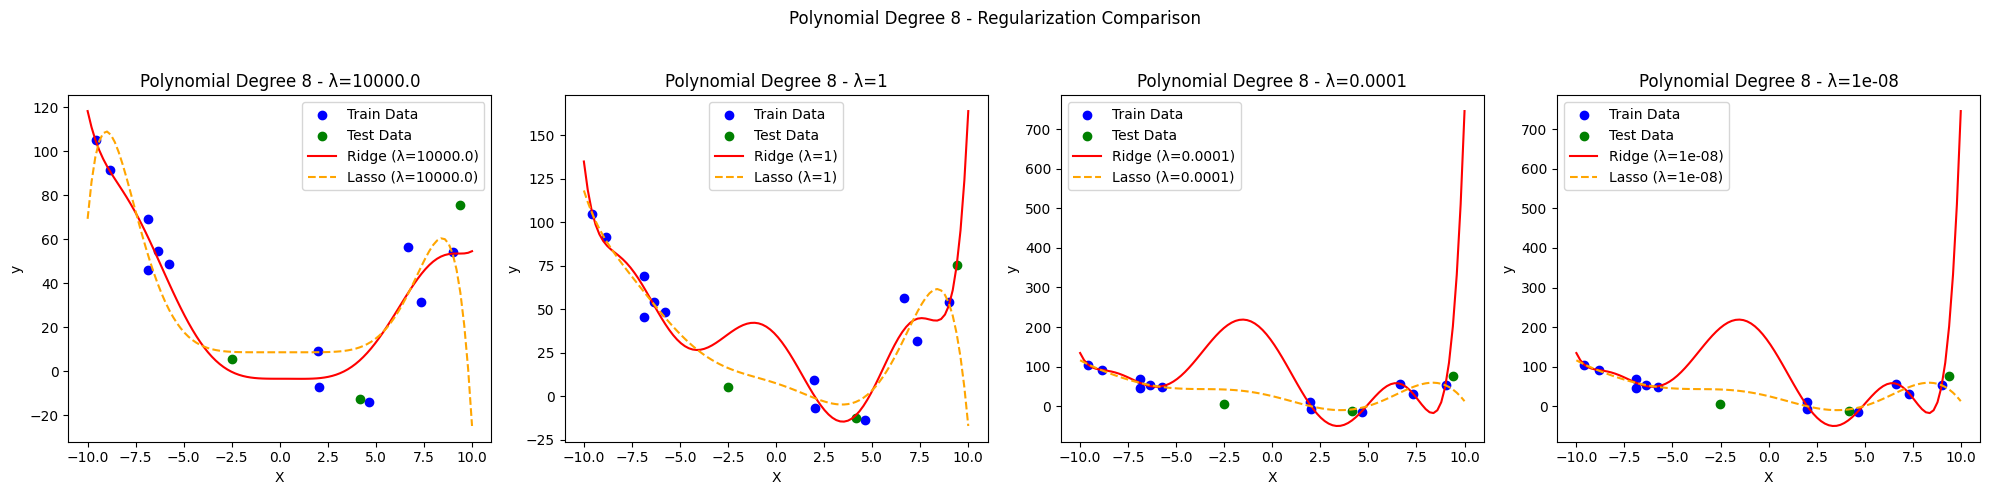

In [ ]:


        ridge_rmse_train[degree_idx, lambda_idx] = compute_rms_error(y_train, y_train_pred_ridge)
        ridge_rmse_test[degree_idx, lambda_idx] = compute_rms_error(y_test, y_test_pred_ridge)
        
        # Plot the fitted curves for both Ridge and Lasso
        X_plot = np.linspace(-10, 10, 100)
        X_plot_poly = ploy_features.transform(X_plot[: ,np.newaxis])

        y_plot_ridge = ridge_model.predict(X_plot_poly)
        y_plot_lasso = lasso_model.predict(X_plot_poly)

        ax = axs[lambda_idx]
        ax.scatter(X_train, y_train, color='blue', label='Train Data')
        ax.scatter(X_test, y_test, color='green', label='Test Data')
        ax.plot(X_plot, y_plot_ridge, color='red', label=f'Ridge (λ={lambda_val})')
        ax.plot(X_plot, y_plot_lasso, color='orange', linestyle='--', label=f'Lasso (λ={lambda_val})')
        ax.set_title(f'Polynomial Degree {degree} - λ={lambda_val}')
        ax.set_xlabel('X')
        ax.set_ylabel('y')
        ax.legend()

    plt.suptitle(f'Polynomial Degree {degree} - Regularization Comparison')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


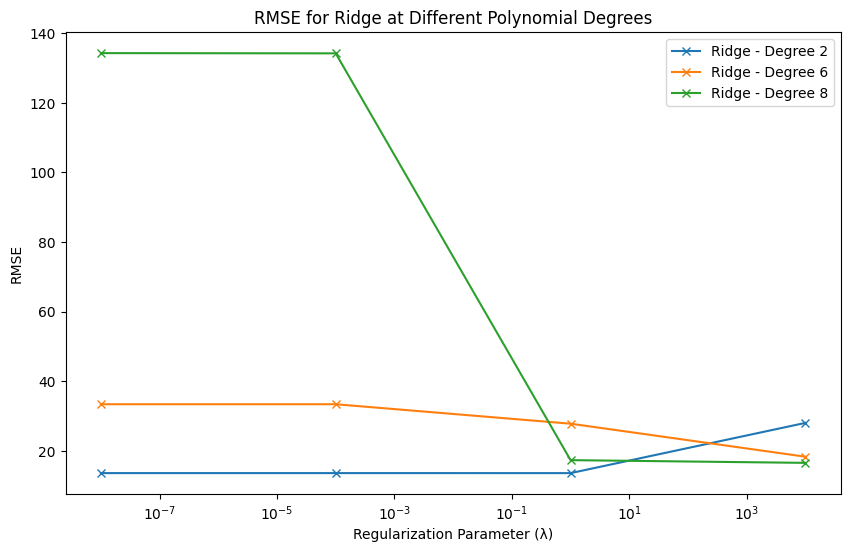

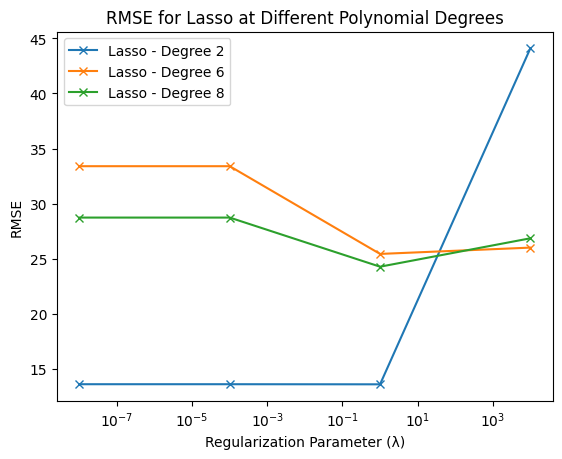

In [23]:
# plot RMSE
plt.figure(figsize=(10, 6))

for degree_idx, degree in enumerate(degrees):
    plt.plot(lambdas, ridge_rmse_test[degree_idx], marker='x', label=f'Ridge - Degree {degree}')
plt.xscale('log')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('RMSE')
plt.title('RMSE for Ridge at Different Polynomial Degrees')
plt.legend()
plt.show()

for degree_idx, degree in enumerate(degrees):
  plt.plot(lambdas, lasso_rmse_test[degree_idx], marker='x', label=f'Lasso - Degree {degree}')

plt.xscale('log')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('RMSE')
plt.title('RMSE for Lasso at Different Polynomial Degrees')
plt.legend()
plt.show()